# Network Science H21: Assignment 1 (by Zheng Luo 21-738-901)

## A01.1 Building and visualising networks

#### Task: Build and visualise the following networks

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

### 1. Star network

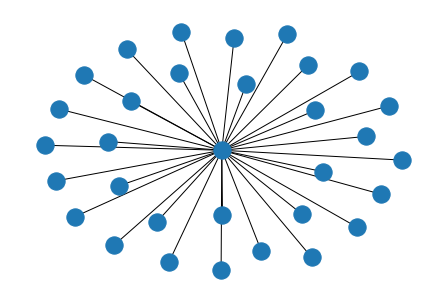

In [2]:
star = nx.Graph() # initiate an instance of graph with no node
star.add_node(31) # add the central node
for i in range(31): # iterate over [0, 30]
    star.add_node(i) # add each node to the network
    star.add_edge(31,i) # connect the newly added node to the central node / connect it with the central node
# star network is completed
nx.draw(star) # draw the star network

### 2. Fully-connected

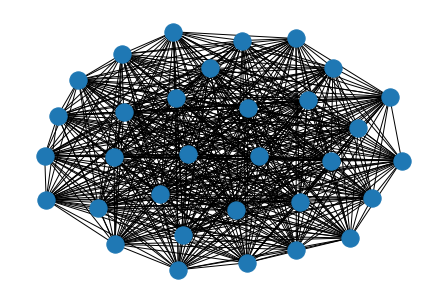

In [3]:
ful_connected = nx.Graph() # initiate an instance of graph with no node
for i in range(32): # iterate over [0, 30]
    ful_connected.add_node(i) # add each node to the network
    for j in range(i):
        ful_connected.add_edge(j,i) # connect the newly added node to all existing nodes
nx.draw(ful_connected) # draw the star network

### 3. One-dimensional lattice with periodic boundary conditions where each $node_𝑖$ has degree $𝑘_𝑖 = 2$

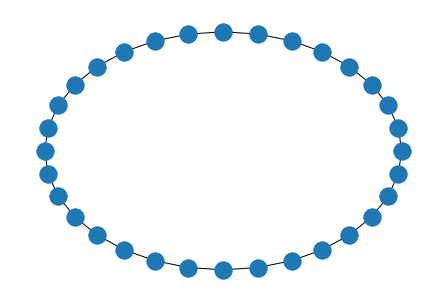

In [4]:
d = 1 # 1-D lattice with degree of 2, meaning it's connected to its nearest neighboring nodes
v = 32 # size of the network
one_d_Lattice = nx.Graph() # initiate an instance of graph with no node
for i in range(v): # iterate over [0, 30]
    one_d_Lattice.add_node(i) # add each node to the network
for j in range(v):
    one_d_Lattice.add_edge(j,(j+1)%v) # connect the newly added node to its right neighbor
    one_d_Lattice.add_edge(j,(j-1)%v) # connect the newly added node to its left neighbor
nx.draw(one_d_Lattice, pos = nx.circular_layout(one_d_Lattice)) # draw the star network

## A01.2 Global properties

#### For each one of the networks provided, compute the fol- lowing network measures

In [5]:
g_karate = nx.read_gml("data/graph_karate.gml") # load zachary_karate network from gml file
g_facebook = nx.read_gml("data/graph_facebook.gml") # load facebook network from gml file
g_netsci = nx.read_gml("data/graph_netsci.gml") # load netsci network from gml file

### 1. Compute the average degree $⟨𝑘⟩$ and the density $\delta$ of the networks.

In [6]:
def get_avg_degree(network): # define a function that return the the average degree of a network
    degree_list = [network.degree()[i] for i in network.nodes()] # unpack the degrees of each node from 
                                                                    # the result dic
    avg_degree = sum(degree_list) / len(degree_list) # sum / len to yield the average
    print ("The average degree is " + str(avg_degree))
    return avg_degree

In [7]:
def get_density(network): # define a function that return the density of an undirected unweighted network
    degree_list = [network.degree()[i] for i in network.nodes()] # unpack the degrees of each node from 
                                                                    # the result dic
    v = len(network.nodes()) # number of nodes
    l = 0.5 * sum(degree_list) # number of links
    #print("There are " + str(l) + " links in the network.")
    if v <= 1:
        max_l = 1
    else:
        max_l = v * (v - 1) # theoretical maximum of links
        #print("There could be at most " + str(max_l) + " links in the network.")
    density = ((2*l) / max_l)
    print ("The density is " + str(density))
    return density

#### Karate network

In [8]:
_ = get_avg_degree(g_karate)
_ = get_density(g_karate)

The average degree is 4.588235294117647
The density is 0.13903743315508021


#### Facebooknetwork

In [9]:
_ = get_avg_degree(g_facebook)
_ = get_density(g_facebook)

The average degree is 43.69101262688784
The density is 0.010819963503439287


#### Netsci network

In [10]:
_ = get_avg_degree(g_netsci)
_ = get_density(g_netsci)

The average degree is 3.753593429158111
The density is 0.0025709544035329526


### 2. Write a function max_degree that takes a network as its argument, and returns two values: the id/name/label of the node with the largest degree, and the value of its degree. Test it on the datasets given.

In [11]:
def max_degree(network): # define the max_degree function returning a tuple with (id, degree) of the max node
    degree_dic = network.degree() # get the dictionary of (id, degree) pairs of all nodes
    degree_list = [degree_dic[i] for i in network.nodes()] # unpack the values of degrees
    max_degree = max(degree_list) # get the max degree in the list of degrees
    for i in network.nodes(): # traverse the dictionary to find the id corresponding to the max_degree
        if degree_dic[i] == max_degree: # whenever a id refers to node with max_degree, return (id, max_degree)
            print ("The node with the largest degree is the node #" + str(i) + " which has a degree of " + str(max_degree))
            return (i, max_degree)

#### Karate network

In [12]:
_ = max_degree(g_karate)

The node with the largest degree is the node #33 which has a degree of 17


#### Facebooknetwork

In [13]:
_ = max_degree(g_facebook)

The node with the largest degree is the node #107 which has a degree of 1045


#### Netsci network

In [14]:
_ = max_degree(g_netsci)

The node with the largest degree is the node #33 which has a degree of 34


## A01.2b Degree Distributions

#### For the same networks, compute and plot the degree distribution

### 1. Select axis scales (lin-lin/lin-log/log-log) that allow you to visualise better the distributions
### 2. Remember to bin the data accordingly to the scales selected

In [15]:
# prepare the lists of degrees of the given networks
karate_degrees = [g_karate.degree[i] for i in g_karate.nodes()]
facebook_degrees = [g_facebook.degree[i] for i in g_facebook.nodes()]
netsci_degrees = [g_netsci.degree[i] for i in g_netsci.nodes()]

#### Karate network

##### lin-lin scale

Text(0, 0.5, 'degree distribution')

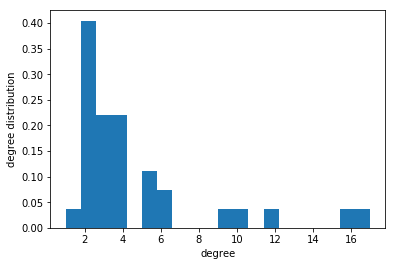

In [16]:
d = karate_degrees
_ = plt.hist(d, bins = 20, density = True)
                # bins parameter  |  density parameter
                # if integer defines # of bins  |  False => sheer number of obs.
                # if array defines intervals,  |  True => (density = counts / (sum(counts) * np.diff(bins))), 
                    #all but the right-most one are [,)  |  s.t. the area ==1
plt.xlabel('degree')
plt.ylabel('degree distribution')

##### lin-log scale

Text(0, 0.5, 'degree distribution')

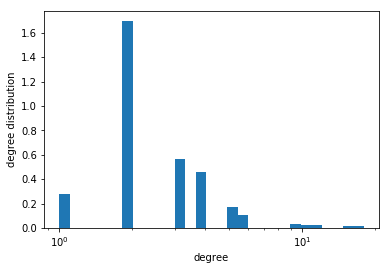

In [17]:
my_bins = np.logspace(np.log10(min(d)), np.log10(max(d) + 1), 30) # 
_ = plt.hist(d, bins = my_bins, density = True)
plt.xscale('log') # set the scale of x-axis to log
plt.xlabel('degree')
plt.ylabel('degree distribution')

##### log-log scale

Text(0, 0.5, 'degree log-distribution')

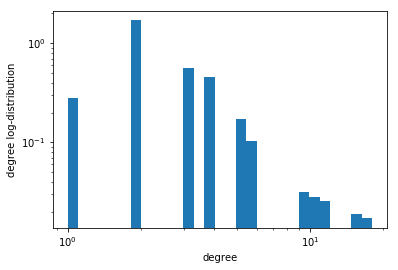

In [18]:
_ = plt.hist(d, bins = my_bins, density = True)
plt.xscale('log') # set the scale of x-axis to log
plt.yscale('log') # set the scale of y-axis to log
plt.xlabel('degree')
plt.ylabel('degree log-distribution')

#### Facebooknetwork

##### lin-lin scale

Text(0, 0.5, 'degree distribution')

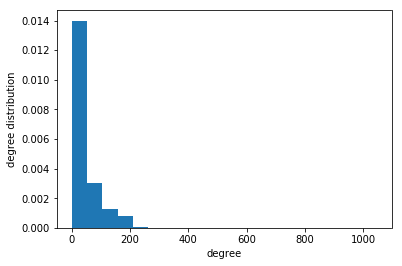

In [19]:
d = facebook_degrees
_ = plt.hist(d, bins = 20, density = True)
plt.xlabel('degree')
plt.ylabel('degree distribution')

##### lin-log scale

Text(0, 0.5, 'degree distribution')

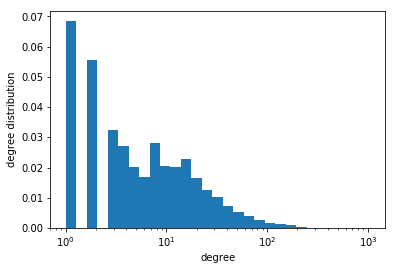

In [20]:
my_bins = np.logspace(np.log10(min(d)), np.log10(max(d) + 1), 30) # 
_ = plt.hist(d, bins = my_bins, density = True)
plt.xscale('log')
plt.xlabel('degree')
plt.ylabel('degree distribution')

##### log-log scale

Text(0, 0.5, 'degree log-distribution')

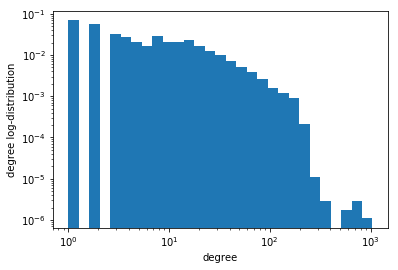

In [21]:
_ = plt.hist(d, bins = my_bins, density = True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('degree')
plt.ylabel('degree log-distribution')

#### Netsci network

##### lin-lin scale

Text(0, 0.5, 'degree distribution')

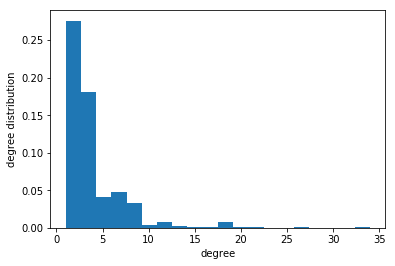

In [22]:
d = netsci_degrees
_ = plt.hist(d, bins = 20, density = True)
plt.xlabel('degree')
plt.ylabel('degree distribution')

##### lin-log scale

Text(0, 0.5, 'degree distribution')

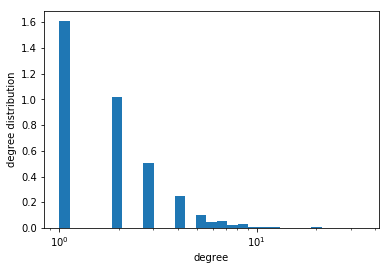

In [23]:
my_bins = np.logspace(np.log10(min(d)), np.log10(max(d) + 1), 30) # 
_ = plt.hist(d, bins = my_bins, density = True)
plt.xscale('log')
plt.xlabel('degree')
plt.ylabel('degree distribution')

##### log-log scale

Text(0, 0.5, 'degree log-distribution')

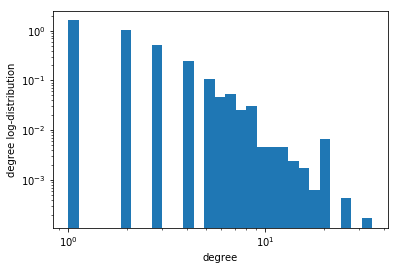

In [24]:
_ = plt.hist(d, bins = my_bins, density = True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('degree')
plt.ylabel('degree log-distribution')

### Analysis: Ploting in lin-lin scale is straight-forward where a certain width of bin represents a fixed interval. But it does not demonstrate the heavy tail well. Lin-log does better in showing the tail. Log-log visually amplifies the shorter bins in the tail portion.